<a href="https://colab.research.google.com/github/CharryDavid/Computer-Vision-Class-/blob/main/Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

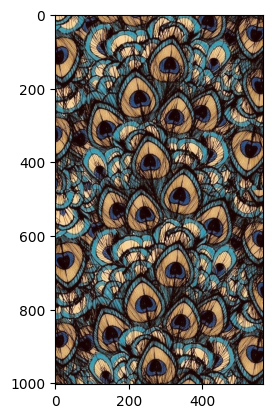

In [2]:
import matplotlib.pyplot as plt
import skimage as sk
from skimage import io

from skimage.filters import threshold_otsu
from skimage.measure import label

# 1. read RGB image
I = sk.io.imread('/content/59137dd46156614712a6f4aa66b09d65.jpg')
plt.imshow(I)

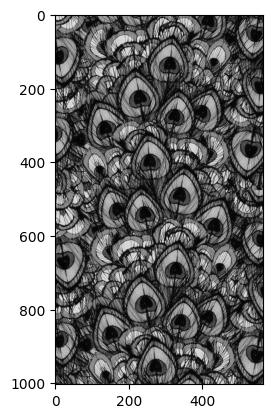

In [3]:
#2.Convert from RGB to grayscale
IG = sk.color.rgb2gray(I) # Convert RGB image to grayscale
plt.imshow(IG,cmap='gray')

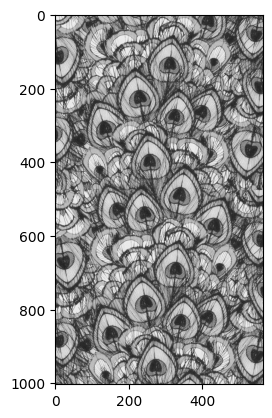

In [4]:
#3. Gamma correction with gamma = 0.5
from skimage import exposure

IGC = exposure.adjust_gamma(IG, 0.5)
plt.imshow(IGC,cmap='gray')

In [5]:
#4. Otsu threshold from grayscale (non gamma corrected)


# Apply Otsu threshold for segmentation :
thresh = threshold_otsu(IG)
print(thresh)

0.3725194891237745


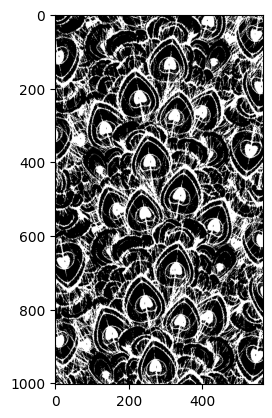

In [6]:
#5. Apply Otsu's threhold to gamma-corrected image
bw = IGC < thresh # keep lighter regions with grayscale intensities above threshold
plt.imshow(bw,cmap='gray')

number of regions is 3673


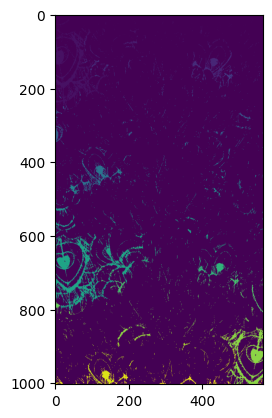

In [7]:
#6. label objects
label_image, nregions = label(bw,return_num=True)

plt.imshow(label_image)
print('number of regions is {}'.format(nregions))

In [8]:
#7. Extract regional properties (Area and eccentricity)
import pandas as pd
from skimage import measure

props = measure.regionprops_table(label_image,properties=['label','area','eccentricity'])

df_features = pd.DataFrame(props)
df_features.head()

,label,area,eccentricity
0,1,60.0,0.884406
1,2,14.0,0.994647
2,3,29.0,0.926522
3,4,1165.0,0.799498
4,5,1.0,0.000000


<Axes: xlabel='area', ylabel='eccentricity'>

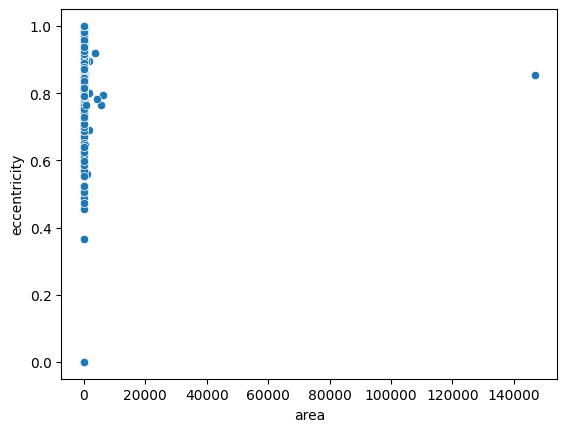

In [9]:

import seaborn as sns

sns.scatterplot(x='area',y='eccentricity',data=df_features)

In [10]:
#8. Find "balloons" as objects with area higher than 500 and eccentricity lower than 0.8

df_balloons = df_features.loc[(df_features['area']>500) & (df_features['eccentricity']<0.8)]

df_balloons.head()
print('number of idenfitied balloons is {}'.format(df_balloons.shape[0]))


number of idenfitied balloons is 7


In [11]:

indx_balloons = df_balloons['label'].values

In [12]:
indx_balloons

array([   4,  169,  400, 1404, 2127, 3029, 3483])

In [13]:

import numpy as np
mask_balloons = np.isin(label_image,indx_balloons)

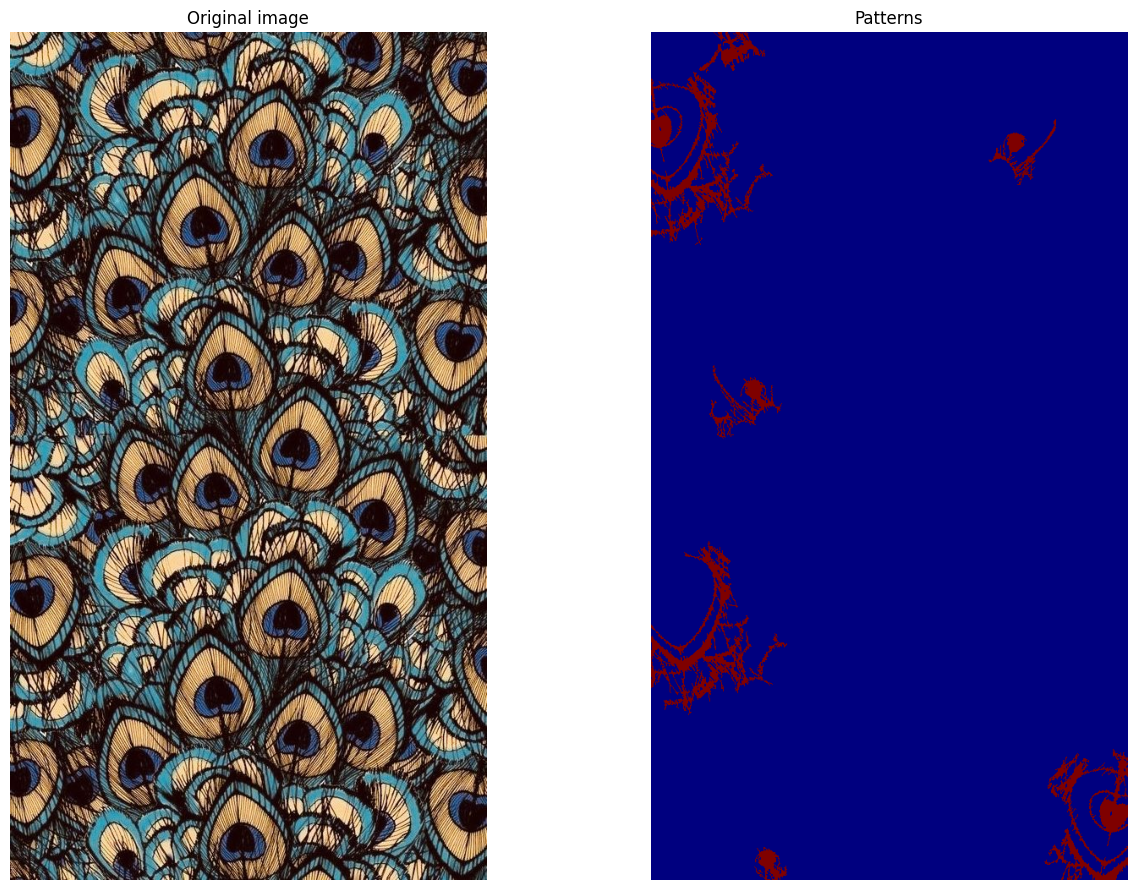

In [17]:
#9. PLot the "patterns"

# Get some figures:
fig, axes = plt.subplots(1,2,figsize=(14, 9))
ax = axes.ravel()
ax[0].imshow(I)
ax[0].set_title('Original image')
ax[1].imshow(mask_balloons,cmap=plt.cm.jet)
ax[1].set_title('Patterns') # set figure title
ax[0].set_axis_off()
ax[1].set_axis_off()
plt.tight_layout()
plt.show()